# 포트폴리오 구성 전략

In [1]:
import pandas as pd 
import pandas_datareader as web 
import pymysql
from sqlalchemy import create_engine
import keyring
import yfinance as yf

# 글로벌 자산 대표 ETF
tickers = [
    'SPY',      # 미국 주식
    'IEV',      # 유럽 주식
    'EWJ',      # 일본 주식
    'EEM',      # 이머징 주식
    'TLT',      # 미국 장기채
    'IEF',      # 미국 중기채
    'IYR',      # 미국 리츠
    'RWX',      # 글로벌 리츠
    'GLD',      # 금
    'DBC'       # 상품
]

In [3]:
tickers

['SPY', 'IEV', 'EWJ', 'EEM', 'TLT', 'IEF', 'IYR', 'RWX', 'GLD', 'DBC']

In [4]:
all_data = {}
for ticker in tickers:
    all_data[ticker] = yf.download(ticker, start='1993-01-22')
    print("done")
    
prices = pd.DataFrame(
    {tic: data['Adj Close']
     for tic, data in all_data.items()}
)
all_data

[*********************100%%**********************]  1 of 1 completed
done
[*********************100%%**********************]  1 of 1 completed
done
[*********************100%%**********************]  1 of 1 completed
done
[*********************100%%**********************]  1 of 1 completed
done
[*********************100%%**********************]  1 of 1 completed
done
[*********************100%%**********************]  1 of 1 completed
done
[*********************100%%**********************]  1 of 1 completed
done
[*********************100%%**********************]  1 of 1 completed
done
[*********************100%%**********************]  1 of 1 completed
done
[*********************100%%**********************]  1 of 1 completed
done


{'SPY':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 1993-01-29   43.968750   43.968750   43.750000   43.937500   24.941389   
 1993-02-01   43.968750   44.250000   43.968750   44.250000   25.118790   
 1993-02-02   44.218750   44.375000   44.125000   44.343750   25.172005   
 1993-02-03   44.406250   44.843750   44.375000   44.812500   25.438084   
 1993-02-04   44.968750   45.093750   44.468750   45.000000   25.544519   
 ...                ...         ...         ...         ...         ...   
 2023-11-22  454.980011  456.380005  453.890015  455.019989  455.019989   
 2023-11-24  455.070007  455.500000  454.730011  455.299988  455.299988   
 2023-11-27  454.649994  455.489990  454.079987  454.480011  454.480011   
 2023-11-28  454.079987  456.269989  453.500000  454.929993  454.929993   
 2023-11-29  457.149994  458.320007  454.200012  454.609985  454.609985   
 
               V

In [6]:
user = 'root'
pw = keyring.get_password('macmini_db', user)
host = '192.168.219.106'
engine = create_engine(f'mysql+pymysql://{user}:{pw}@{host}:3306/stock')
# # DB의 sample_etf 테이블에 저장
# prices.to_sql(name='sample_etf', con=engine, index=True, if_exists='replace')

## 수익률 계산 및 상관관계 확인하기

In [7]:
price = pd.read_sql('SELECT * FROM sample_etf;', con=engine)
price.dropna(inplace=True)
price.set_index('Date', inplace=True)
price

,SPY,IEV,EWJ,EEM,TLT,IEF,IYR,RWX,GLD,DBC
Date,,,,,,,,,,
2006-12-19,102.879883,31.917747,43.325676,26.488396,54.367031,55.679230,43.934036,26.275335,61.799999,22.972263
2006-12-20,102.821991,31.732323,43.634224,26.781502,54.360962,55.665813,44.299290,26.327335,61.619999,23.018652
2006-12-21,102.445839,31.748484,43.883564,26.733566,54.633900,55.866661,43.873348,26.357655,61.380001,22.786703
2006-12-22,101.816490,31.544094,44.039406,26.829430,54.215424,55.612259,43.532578,26.604656,61.650002,22.962984
2006-12-26,102.416916,31.568489,44.008236,27.078682,54.379158,55.652435,43.969189,26.691301,61.980000,22.610426
...,...,...,...,...,...,...,...,...,...,...
2023-11-22,455.019989,50.160000,62.490002,39.520000,90.870003,92.750000,82.250000,24.920000,184.559998,24.180000
2023-11-24,455.299988,50.669998,62.610001,39.540001,89.800003,92.269997,82.550003,25.049999,185.520004,24.020000
2023-11-27,454.480011,50.500000,62.560001,39.380001,91.300003,92.970001,82.849998,25.049999,186.770004,23.860001


In [8]:
rets = price.pct_change(1).dropna()
engine.dispose()

rets.tail().round(4)

,SPY,IEV,EWJ,EEM,TLT,IEF,IYR,RWX,GLD,DBC
Date,,,,,,,,,,
2023-11-22,0.0039,0.0010,0.0063,-0.0020,0.0035,-0.0003,0.0038,-0.0004,-0.0043,-0.0086
2023-11-24,0.0006,0.0102,0.0019,0.0005,-0.0118,-0.0052,0.0036,0.0052,0.0052,-0.0066
2023-11-27,-0.0018,-0.0034,-0.0008,-0.0040,0.0167,0.0076,0.0036,0.0000,0.0067,-0.0067
2023-11-28,0.0010,-0.0002,-0.0002,0.0084,0.0020,0.0044,0.0059,0.0028,0.0133,0.0122
2023-11-29,-0.0007,0.0040,-0.0010,-0.0058,0.0126,0.0052,0.0073,0.0020,0.0015,0.0070


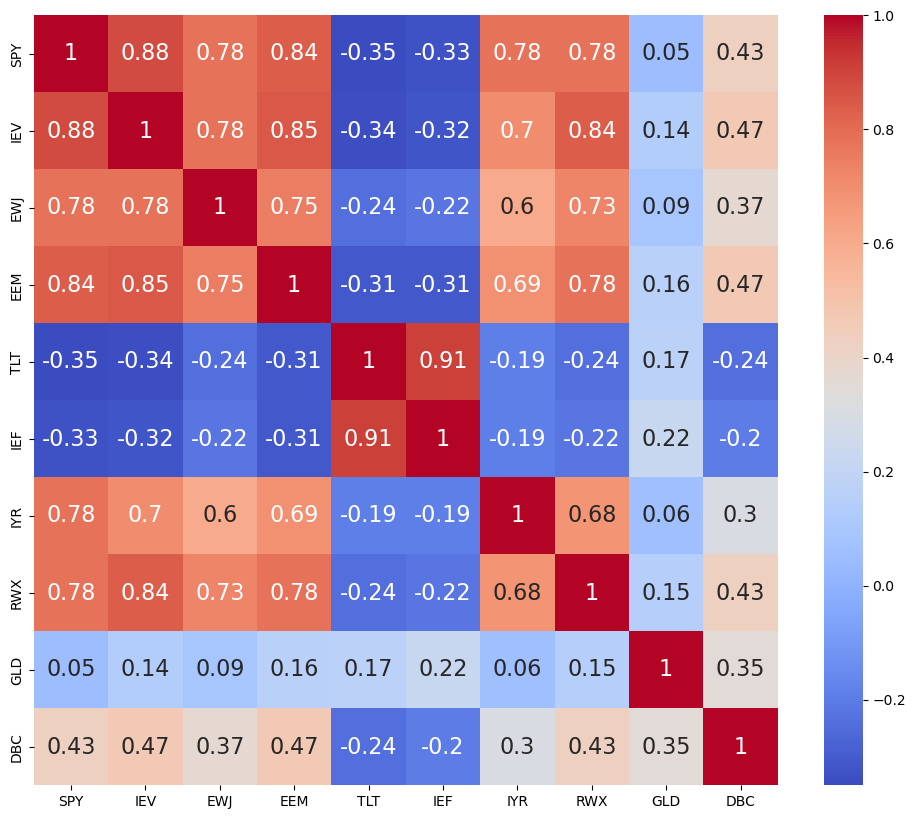

In [9]:
# correlation between ETF returns

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(rets.corr().round(2), annot=True, annot_kws={'size': 16}, cmap='coolwarm')
plt.show()

In [11]:
import riskfolio as rp 

# 포트폴리오 객체 생성
port = rp.Portfolio(returns=rets)

# 입력값 계산
method_mu = 'hist'  # 역사적 데이터를 바탕으로 기대 수익률 추정
method_cov = 'hist'  # 역사적 데이터를 바탕으로 분산-공분산 행렬 추정

# 객체에 수익률 및 분산-공분산 입력
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

model = 'Classic'   # Classic (역사적 데이터) / BL (블랙-리터만) / FM (팩터 모형)
rm = 'MV'           # 위험 측정 방법, MV는 표준편차
obj = 'Sharpe'      # 목적함수, MinRisk(최소분산) / MaxRet(최대수익률) / Utility(효용) / Sharpe(샤프지수)
hist = True         # 역사적 데이터 사용
rf = 0              # 무위험 수익률
l = 0               # 위험 회피 계수, obj가 'Utility'일 때만 사용

# optimization
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

round(w.T, 4)

,SPY,IEV,EWJ,EEM,TLT,IEF,IYR,RWX,GLD,DBC
weights,0.2519,0.0,0.0,0.0,0.0,0.6366,0.0,0.0,0.1115,0.0


In [13]:
points = 50     # 효율적 투자선을 구성하는 샘플 갯수
frontier = port.efficient_frontier(
    model=model,
    rm=rm,
    points=points,
    rf=rf,
    hist=hist
)
frontier.T.head().round(4)

,SPY,IEV,EWJ,EEM,TLT,IEF,IYR,RWX,GLD,DBC
0,0.1291,0.0,0.0068,0.0,0.0,0.7860,0.0,0.0,0.0000,0.0780
1,0.2096,0.0,0.0000,0.0,0.0,0.7213,0.0,0.0,0.0655,0.0035
2,0.2403,0.0,0.0000,0.0,0.0,0.6608,0.0,0.0,0.0989,0.0000
3,0.2620,0.0,0.0000,0.0,0.0,0.6154,0.0,0.0,0.1226,0.0000
4,0.2801,0.0,0.0000,0.0,0.0,0.5775,0.0,0.0,0.1424,0.0000


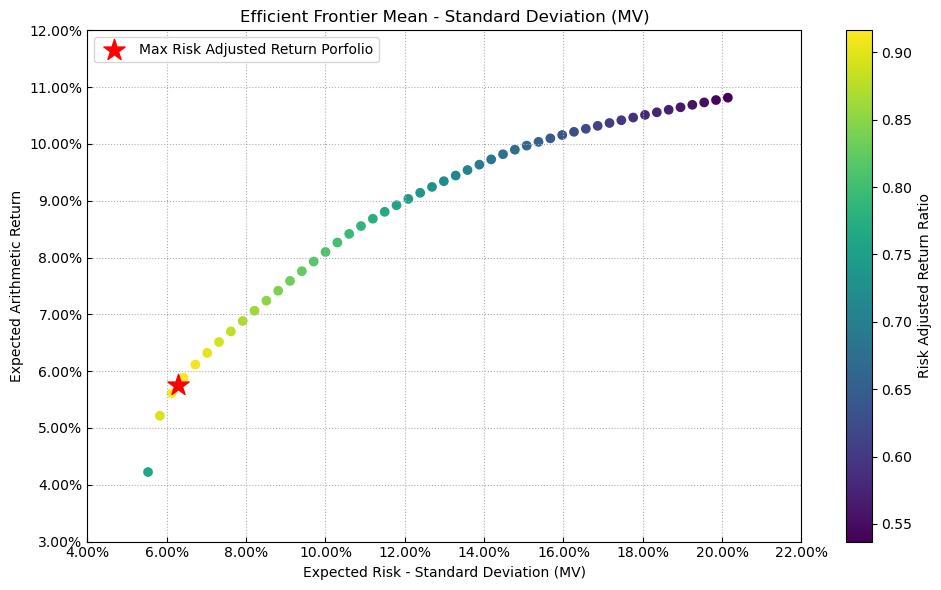

In [14]:
# plot graph

label = 'Max Risk Adjusted Return Porfolio'
mu = port.mu    # expected return
cov = port.cov  # variance-covariance matrix
returns = port.returns  # 자산별 수익률

ax = rp.plot_frontier(
    w_frontier=frontier,
    mu=mu,
    cov=cov,
    returns=returns,
    rm=rm,
    alpha=0.05,
    cmap='viridis',
    w=w,
    label=label,
    marker='*',
    s=16,
    c='r',
    height=6,
    width=10,
    ax=None
)

## 최소분산 포트폴리오

In [15]:
import riskfolio as rp 

port = rp.Portfolio(returns=rets)
method_mu = 'hist'
method_cov = 'hist'
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

model = 'Classic'
rm = 'MV'
obj = 'MinRisk'
hist = True
rf = 0
l =0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

round(w.T, 4)

,SPY,IEV,EWJ,EEM,TLT,IEF,IYR,RWX,GLD,DBC
weights,0.1291,0.0,0.0068,0.0,0.0,0.786,0.0,0.0,0.0,0.078


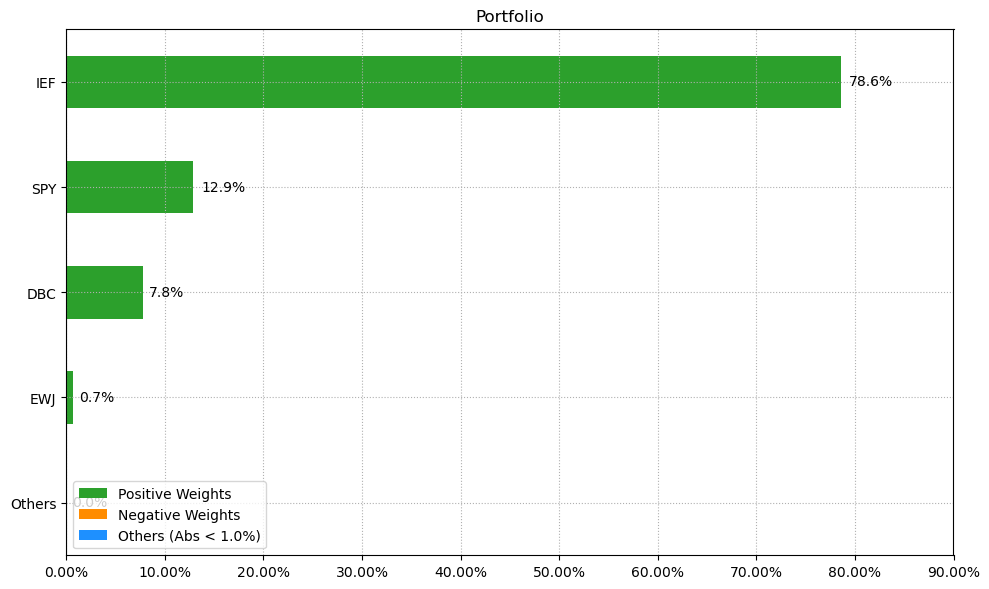

In [16]:
# plot graph
ax = rp.plot_bar(w=w, title='Portfolio', kind='h', ax=None)

### 최소 및 최대 투자비중 제약조건

In [17]:
# ETF 명과 자산군을 데이터프레임 형태로 생성
asset_classes = {
    'Asset':
        ['SPY', 'IEV', 'EWJ', 'EEM', 'TLT', 'IEF', 'IYR', 'RWX', 'GLD', 'DBC'],
    'Class':
        ['stock', 'stock', 'stock', 'stock', 'bond', 'bond', 'alternative', 'alternative', 'alternative', 'alternative']
}

asset_classes = pd.DataFrame(asset_classes)
asset_classes

,Asset,Class
0,SPY,stock
1,IEV,stock
2,EWJ,stock
3,EEM,stock
4,TLT,bond
5,IEF,bond
6,IYR,alternative
7,RWX,alternative
8,GLD,alternative
9,DBC,alternative


In [18]:
# constraints

contraints = {
    'Disalbed': [False, False],    
    'Type': ['All Assets', 'All Assets'],   
    'Set' : ['', ''],
    'Position' : ['', ''],
    'Sign' : ['>=', '<='],
    'Weight' : [0.05, 0.2],
    'Type Relative' : ['', ''],
    'Relative Set' : ['', ''],
    'Relative' : ['', ''],
    'Factor' : ['', '']
}

contraints = pd.DataFrame(contraints)
contraints

,Disalbed,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,>=,0.05,,,,
1,False,All Assets,,,<=,0.20,,,,


In [19]:
# asset_contraints() 함수를 통해 제약조건을 행렬 형태로 변경
# 제약조건은 Aw >= B 형태로 입력
A, B = rp.assets_constraints(contraints, asset_classes)

# 제약조건 부분에 위해서 구한 행렬을 입력
port.ainequality = A
port.binequality = B

# optimization() 함수를 통해 최소분산 포트폴리오 해를 구한다.
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

w.T

,SPY,IEV,EWJ,EEM,TLT,IEF,IYR,RWX,GLD,DBC
weights,0.05,0.05,0.05,0.05,0.2,0.2,0.05,0.05,0.197402,0.102598


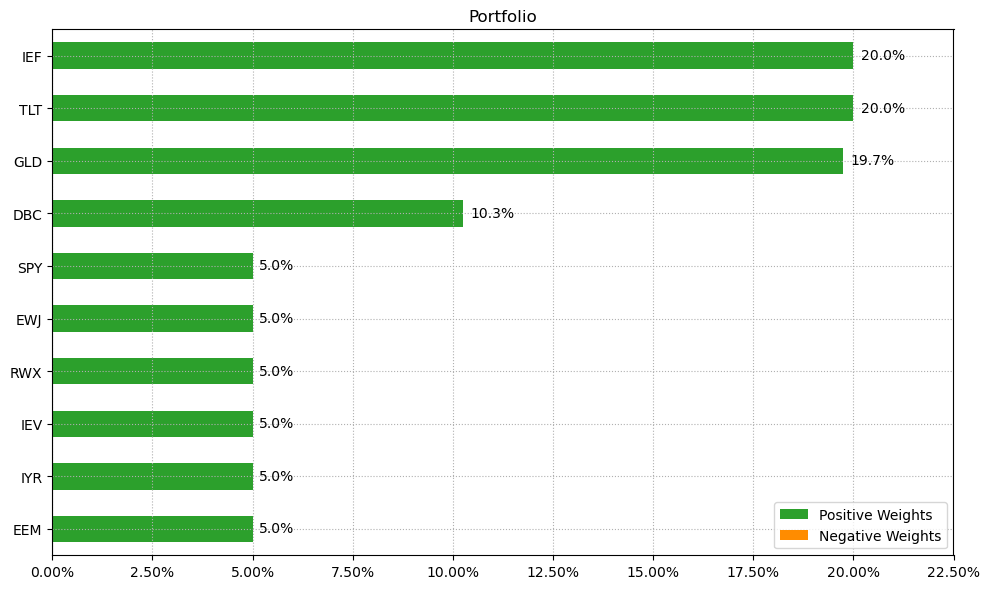

In [20]:
# plot bar chart
ax = rp.plot_bar(w=w, title='Portfolio', kind='h', ax=None)

### 각 종목별 제약조건

In [26]:
contraints = {
    'Disabled': 
        [False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,],
    'Type':
        ['Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets',
         'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets'],
    'Set' :
        ['Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets',
         'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets'],
    'Position' :
        ['SPY', 'IEV', 'EEM', 'EWJ', 'TLT', 'IEF', 'IYR', 'RWX', 'GLD', 'DBC',
         'SPY', 'IEV', 'EEM', 'EWJ', 'TLT', 'IEF', 'IYR', 'RWX', 'GLD', 'DBC'],
    'Sign' : 
        ['>=', '>=', '>=', '>=', '>=', '>=', '>=', '>=', '>=', '>=', 
         '<=', '<=', '<=', '<=', '<=', '<=', '<=', '<=', '<=', '<='],
    'Weight' :
        [0.10, 0.10, 0.05, 0.05, 0.10, 0.10, 0.05, 0.05, 0.03, 0.03, 
         0.25, 0.25, 0.20, 0.20, 0.20, 0.20, 0.10, 0.10, 0.08, 0.08],
    'Type Relative' :
        ['', '', '', '', '', '', '', '', '', '',
         '', '', '', '', '', '', '', '', '', ''],
    'Relative Set' :
        ['', '', '', '', '', '', '', '', '', '',
         '', '', '', '', '', '', '', '', '', ''],
    'Relative' :
        ['', '', '', '', '', '', '', '', '', '',
         '', '', '', '', '', '', '', '', '', ''],
    'Factor' :
        ['', '', '', '', '', '', '', '', '', '',
         '', '', '', '', '', '', '', '', '', '']              
}

contraints = pd.DataFrame(contraints)
contraints

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,Assets,Assets,SPY,>=,0.10,,,,
1,False,Assets,Assets,IEV,>=,0.10,,,,
2,False,Assets,Assets,EEM,>=,0.05,,,,
3,False,Assets,Assets,EWJ,>=,0.05,,,,
4,False,Assets,Assets,TLT,>=,0.10,,,,
5,False,Assets,Assets,IEF,>=,0.10,,,,
6,False,Assets,Assets,IYR,>=,0.05,,,,
7,False,Assets,Assets,RWX,>=,0.05,,,,
8,False,Assets,Assets,GLD,>=,0.03,,,,
9,False,Assets,Assets,DBC,>=,0.03,,,,


In [27]:
A, B = rp.assets_constraints(contraints, asset_classes)

port.ainequality = A
port.binequality = B 

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

w.T

,SPY,IEV,EWJ,EEM,TLT,IEF,IYR,RWX,GLD,DBC
weights,0.1,0.1,0.09,0.05,0.2,0.2,0.05,0.05,0.08,0.08


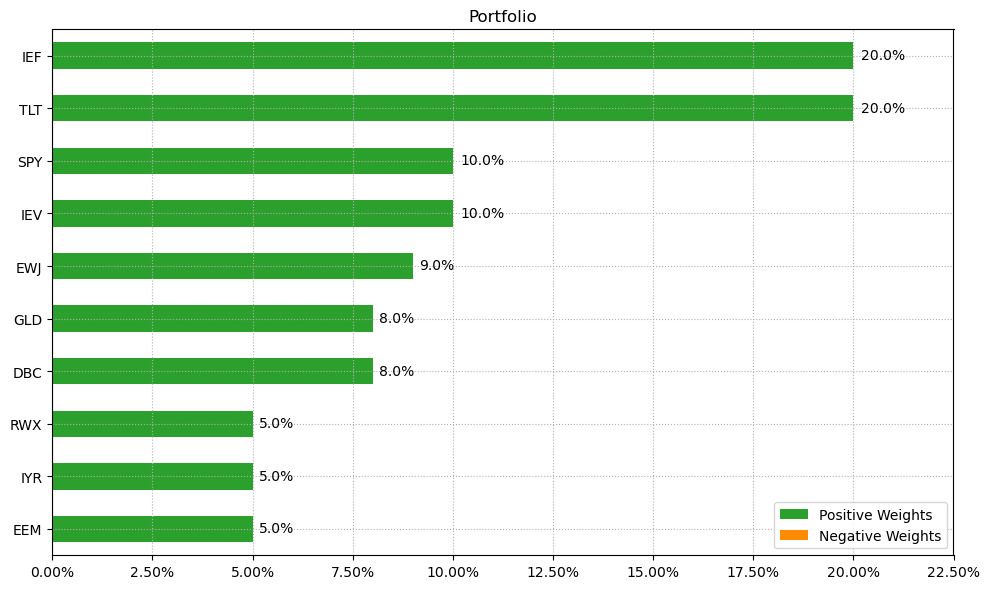

In [28]:
# plot graph
ax = rp.plot_bar(w=w, title='Portfolio', kind='h', ax=None)

### 자산군 별 비중

In [33]:
contraints = {
    'Disabled' :
        [False, False, False, False, 
         False, False, False, False],
    'Type' :
        ['All Assets', 'All Assets', 'Classes', 'Classes', 
         'Classes', 'Classes', 'Classes', 'Classes'],
    'Set' :
        ['', '', 'Class', 'Class', 'Class', 'Class', 'Class', 'Class'],
    'Position' :
        ['', '', 'stock', 'bond', 'alternative', 'stock', 'bond', 'alternative'],
    'Sign' :
        ['>=', '<=', '>=', '>=', '>=', '<=', '<=', '>='],
    'Weight' :
        [0.03, 0.20, 0.40, 0.30, 0.10, 0.70, 0.50, 0.20],
    'Type Relative' :
        ['', '', '', '', '', '', '', ''],
    'Relative Set' :
        ['', '', '', '', '', '', '', ''],
    'Relative' :
        ['', '', '', '', '', '', '', ''],
    'Factor' :
        ['', '', '', '', '', '', '', '']
}

contraints = pd.DataFrame(contraints)
display(contraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,>=,0.03,,,,
1,False,All Assets,,,<=,0.20,,,,
2,False,Classes,Class,stock,>=,0.40,,,,
3,False,Classes,Class,bond,>=,0.30,,,,
4,False,Classes,Class,alternative,>=,0.10,,,,
5,False,Classes,Class,stock,<=,0.70,,,,
6,False,Classes,Class,bond,<=,0.50,,,,
7,False,Classes,Class,alternative,>=,0.20,,,,


In [34]:
# portfolio

A, B = rp.assets_constraints(contraints, asset_classes)

port.ainequality = A
port.binequality = B

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

w.T

,SPY,IEV,EWJ,EEM,TLT,IEF,IYR,RWX,GLD,DBC
weights,0.2,0.03,0.14,0.03,0.2,0.2,0.03,0.03,0.11,0.03


In [35]:
# 자산군 별 제약조건 만족하는지 여부 확인
w_concat = pd.concat([asset_classes.set_index('Asset'), w], axis=1)
w_concat.groupby(['Class']).sum().sort_values(['weights'], ascending=False)

,weights
Class,
stock,0.4
bond,0.4
alternative,0.2


## 위험 균형 포트폴리오

In [36]:
import riskfolio as rp

port = rp.Portfolio(returns=rets)
method_mu = 'hist'
method_cov = 'hist'
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

model = 'Classic'
rm = 'MV'
rf = 0
b = None    # 위험기여도 제약조건

w_rp = port.rp_optimization(model=model, rf=rf, b=b, hist=hist)

w_rp.T

,SPY,IEV,EWJ,EEM,TLT,IEF,IYR,RWX,GLD,DBC
weights,0.062959,0.050428,0.061165,0.041684,0.169047,0.337587,0.04359,0.054712,0.095916,0.082912


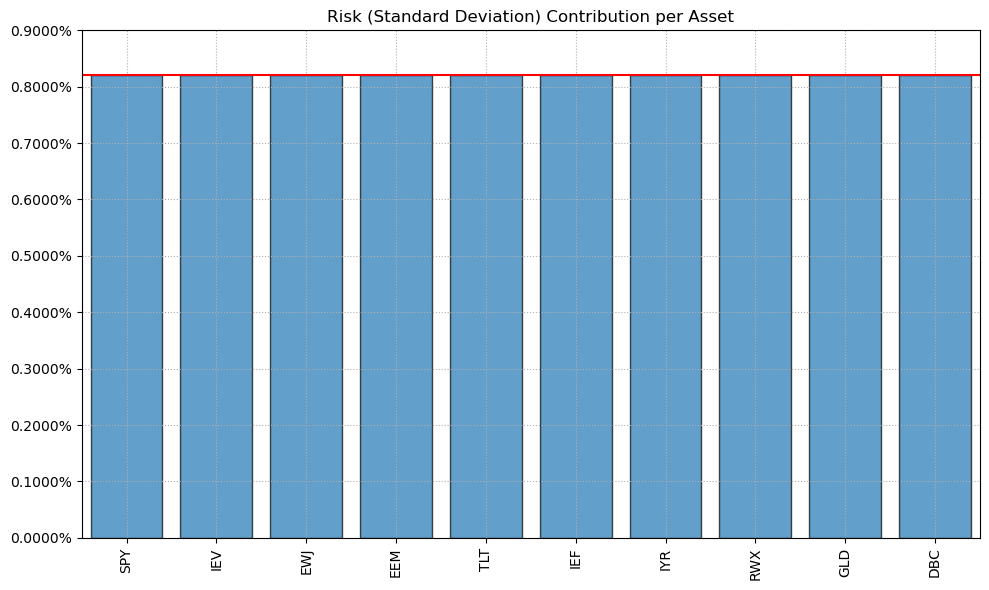

In [40]:
# 모든 자산이 동일 위험 기여도를 가지는지 확인
ax = rp.plot_risk_con(
    w_rp,
    cov=port.cov,
    returns=port.returns,
    rm=rm,
    rf=0,
    alpha=0.01,
    color='tab:blue',
    height=6,
    width=10,
    ax=None
)

### 위험예산 포트폴리오

In [64]:
import numpy as np
b = [0.15, 0.15, 0.15, 0.15, 0.10, 0.10, 0.05, 0.05, 0.05, 0.05]

In [66]:
b = [0.15, 0.15, 0.15, 0.15, 0.10, 0.10, 0.05, 0.05, 0.05, 0.05]
# w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)
# w_rp.T